<a href="https://colab.research.google.com/github/lyledillion/Data-Science-1002/blob/main/Assignments/06_Pandas_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas exercises 1

1. Import dependencies

In [2]:
import pandas as pd

---

In [7]:
list = [98, 24, 46, 87, 33]

2. Convert `list` to a pandas series using `pd.Series`

In [4]:
series = pd.Series(list)

3. Take the above series and add an index that starts at 2 and steps by 3

In [6]:
index_1= range(2, 2 + len(series) *3 ,3)
print(series)

0    98
1    24
2    46
3    87
4    33
dtype: int64


4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [9]:

data = {
    'Name': ['Caroline', 'Ava', 'George', 'Tyler'],
    'Age': [45, 31, 66, 81],
    'Career': ['Doctor', 'Teacher', 'Author', 'Chef']

}
df=pd.DataFrame(data)
print(df)

       Name  Age   Career
0  Caroline   45   Doctor
1       Ava   31  Teacher
2    George   66   Author
3     Tyler   81     Chef


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [15]:
df= pd.DataFrame(data, index=pd.Index(name='participant_id', data= range (1,5)))

print (df)

                    Name  Age   Career
participant_id                        
1               Caroline   45   Doctor
2                    Ava   31  Teacher
3                 George   66   Author
4                  Tyler   81     Chef


6. Use a pandas function to determine the data types of the columns of `df`.

In [18]:
column_type = df.dtypes
print(column_type)

Name      object
Age        int64
Career    object
dtype: object


7. Using bracket notation, reference column `name`

In [21]:
df['Name']

participant_id
1    Caroline
2         Ava
3      George
4       Tyler
Name: Name, dtype: object

8. Using dot notation, reference column `name`

In [22]:
df.Name

participant_id
1    Caroline
2         Ava
3      George
4       Tyler
Name: Name, dtype: object

8. Reference column `name` and have it returned in a dataframe.

In [25]:
name_df= pd.DataFrame({'Column Name': df.columns})
print(name_df)

  Column Name
0        Name
1         Age
2      Career


9. Show the 3rd element in column `career`.

In [28]:
third_element= df['Career'].iloc[2]
print(third_element)

Author


10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [32]:
from sklearn.datasets import load_iris

iris_data= load_iris()
iris = pd.DataFrame(data= iris_data.data, columns = iris_data.feature_names)
print (iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [36]:
correlation = iris['sepal length (cm)'].corr(iris['sepal width (cm)'])
print("Correlation between the two variables: ", correlation)

Correlation between the two variables:  -0.11756978413300208


12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [45]:
iris['species']= iris_data.target_names[iris_data.target]

iris['sepal length (cm)'] = pd.to_numeric(iris['sepal length (cm)'])
iris['sepal width (cm)'] = pd.to_numeric(iris['sepal width (cm)'])
correlation = iris.groupby('species')['sepal length (cm)', 'sepal width (cm)'].corr().iloc[0::2,-1]
highest_correlation = correlation.groupby('species').max().idxmax()

print("Species with the highest correlation: ", highest_correlation
      )

Species with the highest correlation:  setosa


<ipython-input-45-8833a5fb57b1>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlation = iris.groupby('species')['sepal length (cm)', 'sepal width (cm)'].corr().iloc[0::2,-1]


13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative (or the least positive) correlation?  Again, include calculations to support your answer.

In [49]:
overall_correlation=iris.corr()
correlation_by_species= iris.groupby('species').corr()
negative_corr_by_species= (
    correlation_by_species.unstack()
    .sort_values(by='species')
    .drop_duplicates()
    .groupby('species')
    .head(2)

  )
print(negative_corr_by_species)

           sepal length (cm)                                     \
           sepal length (cm) sepal width (cm) petal length (cm)   
species                                                           
setosa                   1.0         0.742547          0.267176   
versicolor               1.0         0.525911          0.754049   
virginica                1.0         0.457228          0.864225   

                             sepal width (cm)                   \
           petal width (cm) sepal length (cm) sepal width (cm)   
species                                                          
setosa             0.278098          0.742547              1.0   
versicolor         0.546461          0.525911              1.0   
virginica          0.281108          0.457228              1.0   

                                              petal length (cm)  \
           petal length (cm) petal width (cm) sepal length (cm)   
species                                                           

<ipython-input-49-bbcaf7b660ac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  overall_correlation=iris.corr()


14.  Once again, the variables `sepal_width` and `petal_length` are negatively correlated.  But for each individual species, these two variables are positively correlated.  How is this possible?  Explain this phenomenon.  Use a data visualization if it helps.


This phenomenon occurs when trends in isolated variables are different than the trend between the entire variable. It is called Simpson's paradox. The scatterplot below helps to explain how each variable has a positive correlation, however they collectively form a negative correlation.

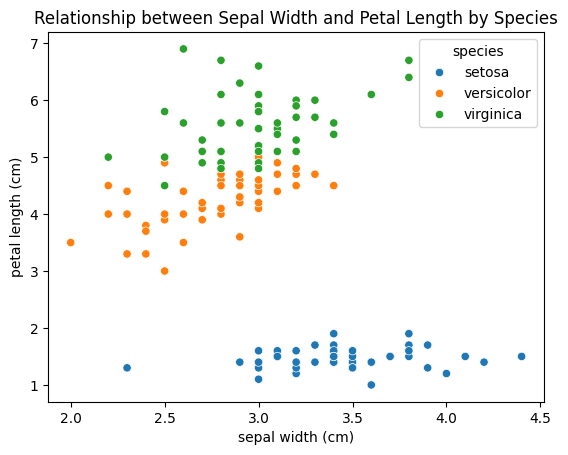

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=iris, x='sepal width (cm)', y='petal length (cm)', hue='species')
plt.title("Relationship between Sepal Width and Petal Length by Species")
plt.show()